In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For PLotting we will use these library

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pf
from plotly.subplots import make_subplots

In [2]:
# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [3]:
from datetime import datetime,timedelta
u=datetime.today()
i=(str(u.date()))
i


'2022-10-12'

In [4]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [5]:
import yfinance as yf
a=yf.download('WIPRO.NS',start='2017-1-1',end=i)

[*********************100%***********************]  1 of 1 completed


In [6]:
a=a.reset_index()

In [7]:
a.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02 00:00:00+05:30,178.143799,179.400040,176.437546,176.831299,172.178116,1230474
1,2017-01-03 00:00:00+05:30,177.375046,177.787537,174.637543,175.125046,170.516724,1843468
2,2017-01-04 00:00:00+05:30,175.125046,179.100037,174.787537,178.350037,173.656860,3025319
3,2017-01-05 00:00:00+05:30,178.912537,182.212540,178.912537,180.150040,175.409515,2608498
4,2017-01-06 00:00:00+05:30,179.437546,180.037552,175.875046,176.231293,171.593887,4190860


In [8]:
a.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1423,2022-10-04 00:00:00+05:30,399.950012,406.000000,399.000000,405.500000,405.500000,6295848
1424,2022-10-06 00:00:00+05:30,409.350006,413.000000,407.450012,410.149994,410.149994,5601939
1425,2022-10-07 00:00:00+05:30,409.799988,411.750000,406.250000,408.100006,408.100006,3790093
1426,2022-10-10 00:00:00+05:30,400.299988,413.500000,399.750000,411.299988,411.299988,9357463
1427,2022-10-11 00:00:00+05:30,414.899994,417.899994,402.299988,404.399994,404.399994,11361646


In [9]:
a.shape

(1428, 7)

In [10]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype                       
---  ------     --------------  -----                       
 0   Date       1428 non-null   datetime64[ns, Asia/Kolkata]
 1   Open       1428 non-null   float64                     
 2   High       1428 non-null   float64                     
 3   Low        1428 non-null   float64                     
 4   Close      1428 non-null   float64                     
 5   Adj Close  1428 non-null   float64                     
 6   Volume     1428 non-null   int64                       
dtypes: datetime64[ns, Asia/Kolkata](1), float64(5), int64(1)
memory usage: 78.2 KB


In [11]:
a.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# MAKING NEW DATAFRAME FROM DATE AND CLOSE PRICE OF STOCK

In [12]:
df=a[['Date','Close']]

In [13]:
df.head()

,Date,Close
0,2017-01-02 00:00:00+05:30,176.831299
1,2017-01-03 00:00:00+05:30,175.125046
2,2017-01-04 00:00:00+05:30,178.350037
3,2017-01-05 00:00:00+05:30,180.150040
4,2017-01-06 00:00:00+05:30,176.231293


In [ ]:
df.tail()

,Date,Close
1422,2022-10-03 00:00:00+05:30,394.500000
1423,2022-10-04 00:00:00+05:30,405.500000
1424,2022-10-06 00:00:00+05:30,410.149994
1425,2022-10-07 00:00:00+05:30,408.100006
1426,2022-10-10 00:00:00+05:30,411.299988


In [14]:
df.shape

(1428, 2)

In [15]:
df.isnull().sum()

Date     0
Close    0
dtype: int64

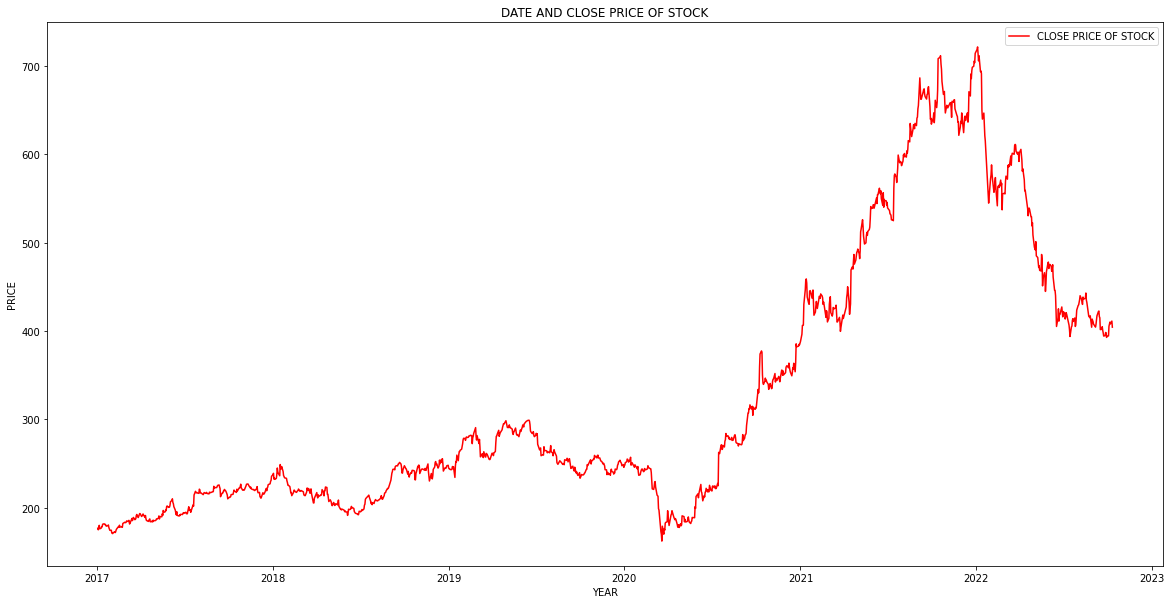

In [16]:

plt.figure(figsize=(20, 10))
plt.plot(df.Date,df.Close,c='r',label='CLOSE PRICE OF STOCK')
plt.title("DATE AND CLOSE PRICE OF STOCK")
plt.xlabel('YEAR')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [17]:
fig = px.line(df, x=df.Date, y=df.Close)
fig.update_traces(marker_line_width=5, opacity=0.9)
fig.update_layout(title_text='Whole period of timeframe of stock close price 2017-2022', 
                  font_size=15, font_color='black')
fig.show()


# min_max

In [18]:
df=a[['Close']]

In [19]:
df.head()

,Close
0,176.831299
1,175.125046
2,178.350037
3,180.150040
4,176.231293


In [20]:
df.tail()

,Close
1423,405.500000
1424,410.149994
1425,408.100006
1426,411.299988
1427,404.399994


In [21]:
df.shape

(1428, 1)

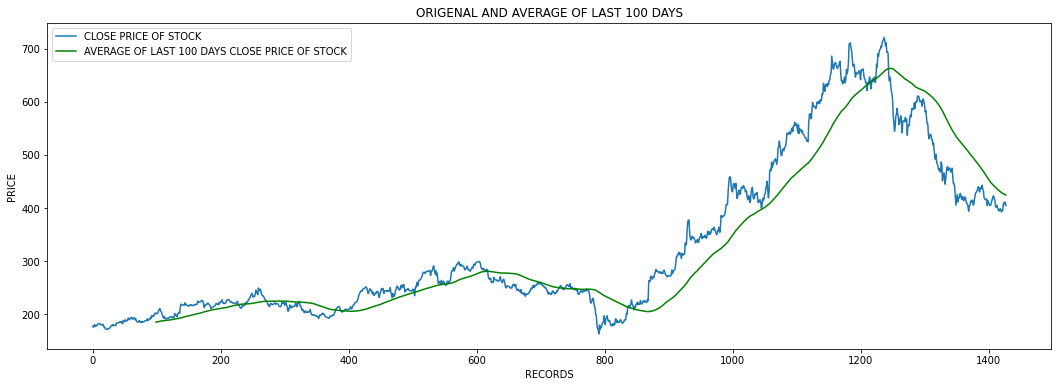

In [22]:
# 100 Days Moving Average Line
ma100 = df.Close.rolling(100).mean()
plt.figure(figsize = (18,6))
plt.plot(df.Close,label='CLOSE PRICE OF STOCK')
plt.plot(ma100, 'g',label='AVERAGE OF LAST 100 DAYS CLOSE PRICE OF STOCK')
plt.title("ORIGENAL AND AVERAGE OF LAST 100 DAYS")
plt.xlabel('RECORDS')
plt.ylabel('PRICE')
plt.legend()
plt.show()

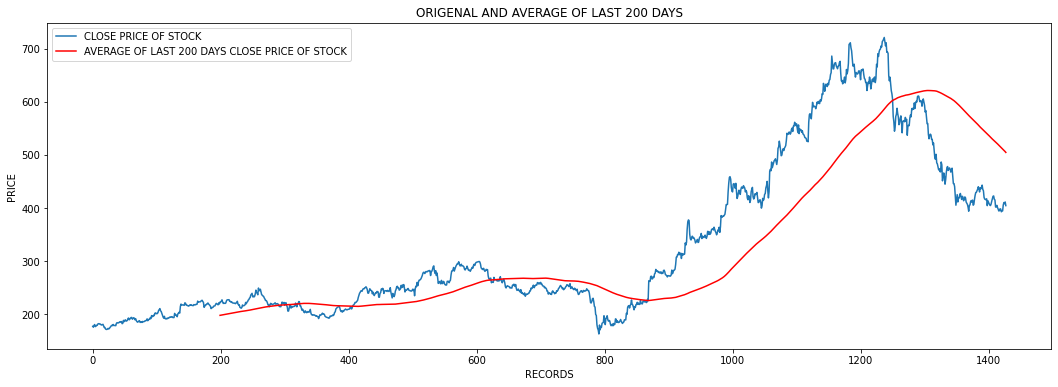

In [23]:
# 200 Days Moving Average Line
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize = (18,6))
plt.plot(df.Close,label='CLOSE PRICE OF STOCK')
plt.plot(ma200, 'r',label='AVERAGE OF LAST 200 DAYS CLOSE PRICE OF STOCK')
plt.title("ORIGENAL AND AVERAGE OF LAST 200 DAYS")
plt.xlabel('RECORDS')
plt.ylabel('PRICE')
plt.legend()
plt.show()

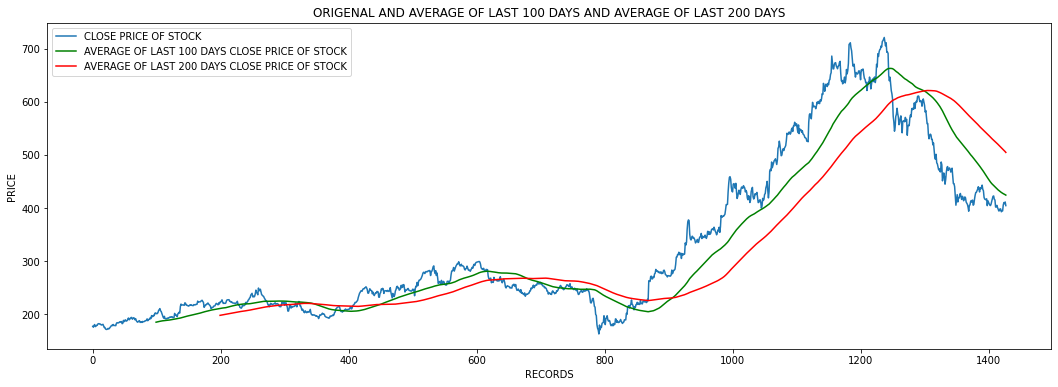

In [24]:
# As per Stock Market Expert if 100 Days MA line cut the 200 Days MA line from up to down side then there is start of Market Down Trend, also 
# if 200 Days MA line cut the 100 Days MA line from up to down side then there is start of Market Up Treand

plt.figure(figsize = (18,6))
plt.plot(df.Close,label='CLOSE PRICE OF STOCK')
plt.plot(ma100, 'g',label='AVERAGE OF LAST 100 DAYS CLOSE PRICE OF STOCK')
plt.plot(ma200, 'r',label='AVERAGE OF LAST 200 DAYS CLOSE PRICE OF STOCK')
plt.title("ORIGENAL AND AVERAGE OF LAST 100 DAYS AND AVERAGE OF LAST 200 DAYS")
plt.xlabel('RECORDS')
plt.ylabel('PRICE')
plt.legend()
plt.show()

# To decrease the computational cost of the data and Memory consumption in the table, we will scale the stock values to values between 0 and 1

In [25]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
print(df)

[[0.02589876]
 [0.02284725]
 [0.02861492]
 ...
 [0.4395064 ]
 [0.44522934]
 [0.43288919]]


In [26]:
df.shape

(1428, 1)

# we keep the training set as 70% and 30% testing set

In [27]:
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (999, 1)
test_data:  (429, 1)


In [37]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
print(range(len(train_data)))

range(0, 998)


In [38]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [39]:
X_train.shape

(898, 100)

In [40]:
y_train.shape

(898,)

In [41]:
y_test.shape

(328,)

# reshape input to be [samples, time steps, features] which is required for LSTM

In [47]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train = ", X_train.shape)
print("X_test = ", X_test.shape)

X_train =  (898, 100, 1)
X_test =  (328, 100, 1)


# Create the Stacked LSTM model

In [54]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(40,return_sequences=True))
model.add(LSTM(40,return_sequences=True))
model.add(LSTM(10))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 40)           14560     
                                                                 
 lstm_5 (LSTM)               (None, 100, 40)           12960     
                                                                 
 lstm_6 (LSTM)               (None, 10)                2040      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 39,971
Trainable params: 39,971
Non-trainable params: 0
_________________________________________________________________


In [55]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=100,verbose=1)

Epoch 1/200
9/9 [==============================] - 12s 589ms/step - loss: 0.0093 - val_loss: 0.0889
Epoch 2/200
9/9 [==============================] - 2s 274ms/step - loss: 0.0033 - val_loss: 0.0558
Epoch 3/200
9/9 [==============================] - 2s 269ms/step - loss: 0.0018 - val_loss: 0.0113
Epoch 4/200
9/9 [==============================] - 2s 273ms/step - loss: 0.0010 - val_loss: 0.0341
Epoch 5/200
9/9 [==============================] - 2s 269ms/step - loss: 8.8546e-04 - val_loss: 0.0200
Epoch 6/200
9/9 [==============================] - 2s 267ms/step - loss: 8.5618e-04 - val_loss: 0.0120
Epoch 7/200
9/9 [==============================] - 2s 269ms/step - loss: 7.6963e-04 - val_loss: 0.0229
Epoch 8/200
9/9 [==============================] - 2s 271ms/step - loss: 7.4229e-04 - val_loss: 0.0282
Epoch 9/200
9/9 [==============================] - 2s 270ms/step - loss: 7.1274e-04 - val_loss: 0.0289
Epoch 10/200
9/9 [==============================] - 2s 270ms/step - loss: 6.7734e-04 - v

In [56]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
score=r2_score(y_test,y_pred)
score

0.9337537948650083

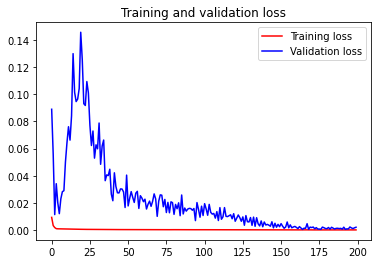

<Figure size 432x288 with 0 Axes>

In [57]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

# Lets Do the prediction and check performance metrics

In [58]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [59]:
train_predict.shape, test_predict.shape

((898, 1), (328, 1))

In [60]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [61]:
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [62]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9897142202817019
Test data R2 score: 0.9337538356134987


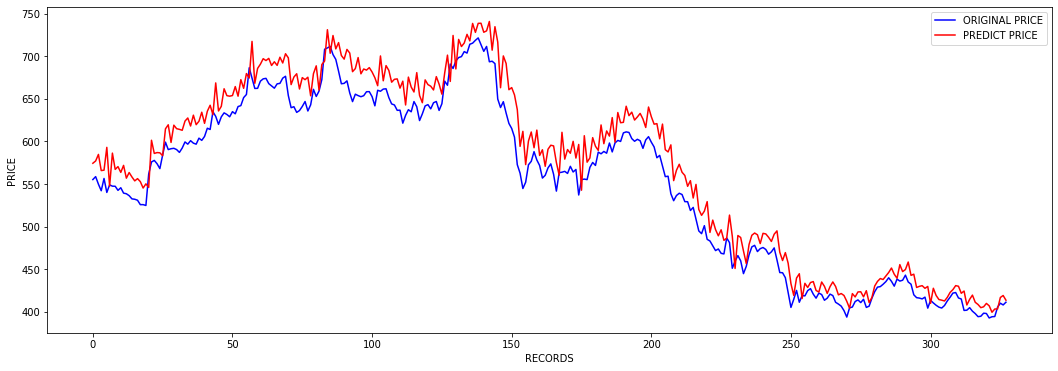

In [63]:
plt.figure(figsize = (18,6))
plt.plot(original_ytest,c='b',label='ORIGINAL PRICE')
plt.plot(test_predict,c='r',label='PREDICT PRICE')
plt.xlabel('RECORDS')
plt.ylabel('PRICE')
plt.legend()
plt.show()

# Calculate RMSE performance metrics

In [66]:
import math
math.sqrt(mean_squared_error(y_train,train_predict))

251.51927587806992

In [67]:
math.sqrt(mean_squared_error(y_test,test_predict))

582.2300661252317

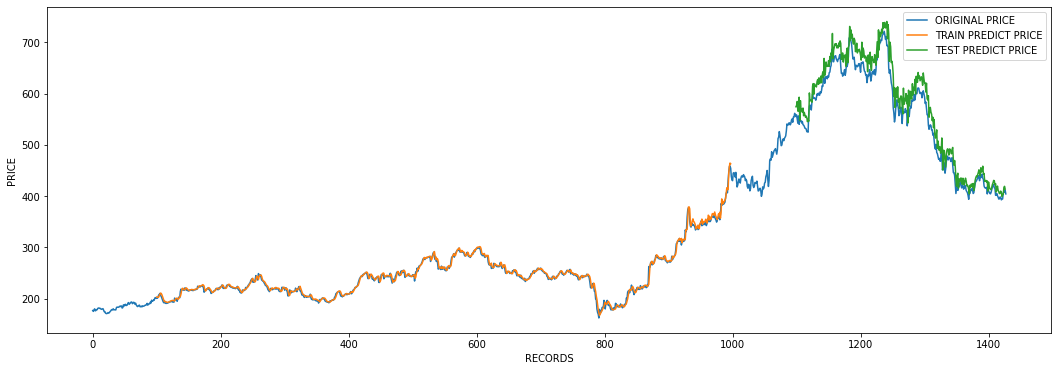

In [68]:
import numpy
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize = (18,6))
plt.plot(scaler.inverse_transform(df),label='ORIGINAL PRICE')
plt.plot(trainPredictPlot,label='TRAIN PREDICT PRICE')
plt.plot(testPredictPlot,label='TEST PREDICT PRICE')
plt.xlabel('RECORDS')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [69]:
x=(len(test_data)-100)
print(len(test_data))
print(x)

429
329


In [70]:
x_input=test_data[x:].reshape(1,-1)
x_input.shape

(1, 100)

In [71]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [72]:
n=int(input("ENTER HOW MANY DAY DO YOU WANT PREDICT"))
print("PREDICT {0} DAYS STOCK PRICE".format(n))

ENTER HOW MANY DAY DO YOU WANT PREDICT30
PREDICT 30 DAYS STOCK PRICE


In [73]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<n):
    
    if(len(temp_input)>100):
        #print(temp_input)
        #temp_input=temp_input+1
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.44333312]
101
1 day input [0.53161049 0.54305642 0.53223645 0.50523116 0.52043281 0.54475545
 0.56138782 0.56460697 0.55155146 0.5576321  0.56004649 0.55593313
 0.54600732 0.5509255  0.55924168 0.53402488 0.5074667  0.50710899
 0.49673612 0.46490206 0.43431997 0.45122059 0.46999909 0.44513994
 0.45908966 0.45855316 0.46955198 0.4737548  0.46213001 0.45372438
 0.46436555 0.4613252  0.44934276 0.45372438 0.46221941 0.45917912
 0.44505054 0.44138423 0.43700261 0.42761336 0.41402129 0.43351515
 0.43512473 0.44666011 0.45005812 0.44442458 0.45148884 0.43431997
 0.43691315 0.45363498 0.4674059  0.47688455 0.47795762 0.4828758
 0.48850934 0.49655727 0.4891353  0.47894123 0.49378523 0.48958241
 0.49137084 0.50201196 0.48770452 0.48305465 0.46078869 0.45479744
 0.45390323 0.45220425 0.45587051 0.43279979 0.4492533  0.44370922
 0.43879104 0.43485647 0.43297864 0.43834393 0.44791198 0.45569166
 0.46436555 0.46552802 0.45417148 0.45193595 0.42797101 0.42850757
 0.4337834  0.42636144 0.42135386 

# Prediction for next enter days by user

In [100]:
final_output = scaler.inverse_transform(lst_output[:])
prediction = final_output.round().tolist()
    
    
import datetime
today = datetime.date.today()
m =0
days = []
while m < n:
  tomorrow=today + datetime.timedelta(days = 1+m)
  m = m+1
  t=tomorrow.strftime("%d/%m/%Y")
  days.append(t)
df5 = pd.DataFrame({'Date':days, 'Price':prediction})
print(df5)


          Date    Price
0   13/10/2022  [410.0]
1   14/10/2022  [421.0]
2   15/10/2022  [435.0]
3   16/10/2022  [448.0]
4   17/10/2022  [459.0]
5   18/10/2022  [470.0]
6   19/10/2022  [479.0]
7   20/10/2022  [489.0]
8   21/10/2022  [501.0]
9   22/10/2022  [514.0]
10  23/10/2022  [528.0]
11  24/10/2022  [543.0]
12  25/10/2022  [558.0]
13  26/10/2022  [574.0]
14  27/10/2022  [589.0]
15  28/10/2022  [604.0]
16  29/10/2022  [619.0]
17  30/10/2022  [634.0]
18  31/10/2022  [648.0]
19  01/11/2022  [662.0]
20  02/11/2022  [675.0]
21  03/11/2022  [687.0]
22  04/11/2022  [699.0]
23  05/11/2022  [709.0]
24  06/11/2022  [719.0]
25  07/11/2022  [728.0]
26  08/11/2022  [737.0]
27  09/11/2022  [744.0]
28  10/11/2022  [751.0]
29  11/11/2022  [758.0]


In [110]:
df3=df.tolist()
df3.extend(lst_output)

In [111]:
df3=scaler.inverse_transform(df3).tolist()

In [112]:
close=[]
for i in range (len(df3)):
  close.append(round(df3[i][0],6))

In [113]:
Date=[]

for i in range(len(a['Date'])):
  Date.append(a['Date'][i])

In [114]:
nm=(len(a['Date'])-1)

In [115]:
for i in range(n):
  Date.append((a['Date'][nm]) + timedelta(days=i+1))

In [116]:
ds={'Close':close,'Date':Date}

In [117]:
df4=pd.DataFrame(ds)

In [118]:
fig = px.line(df4, x=df4.Date, y=df4.Close)
fig.update_traces(marker_line_width=5, opacity=0.9)
fig.update_layout(title_text='WHOLE PERIOD OF TIMEFRAME OF STOCK CLOSE PRICE', 
                  font_size=15, font_color='black')
fig.show()